
# Group Project: Customer Segmentation in Python

### Vikash Gupta (203040029)


# 1. Data collection:
We collected the data first. For this case, we take the data from UCI Machine Learning called Online Retail dataset. The dataset itself is a transactional data that contains transactions from December 1st 2010 until December 9th 2011 for a UK-based online retail. Each row represents the transaction that occurs. It includes the product name, quantity, price, and other columns that represents ID.
The size of dataset is (541909,8). In this case, we haven’t used all of the rows. Instead, we have sample 10000 rows from the dataset, and we assumed that as the whole transactions that the customers do.



### Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing the dataset

In [4]:
dataset = pd.read_csv('C:/Users/Hp/OneDrive/Documents/Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:, [3, 4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# 2. EDA:

In [6]:
dataset.shape

(200, 5)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

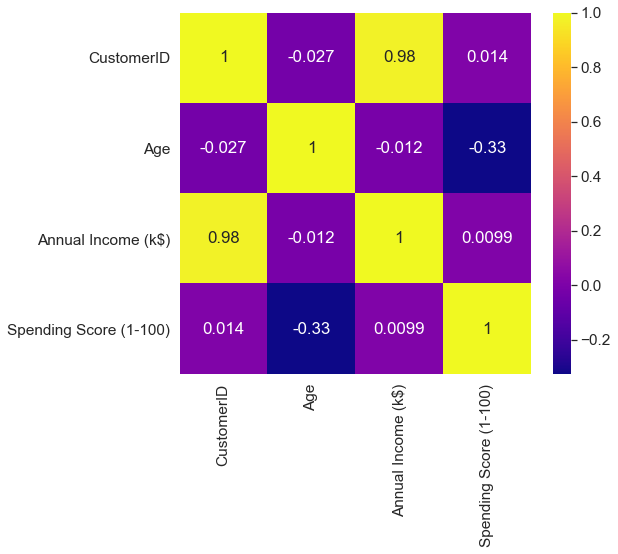

In [9]:
cor = dataset.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='plasma')
plt.tight_layout()
plt.show()

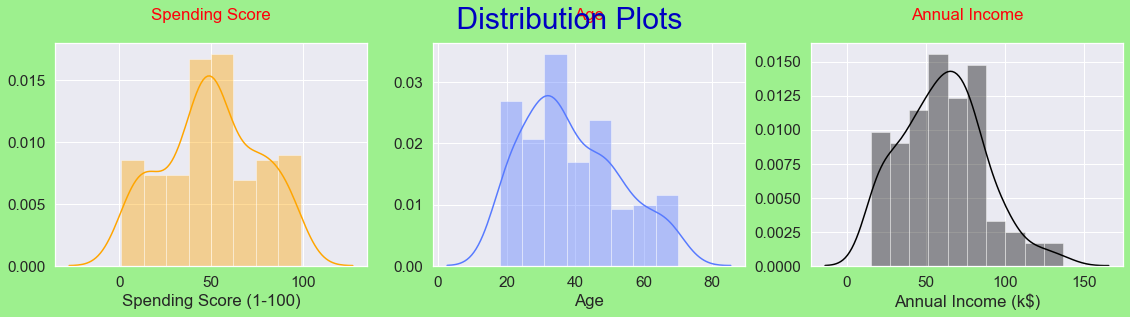

In [10]:
# -Distribution Plots-

plt.figure(figsize=(16,12),facecolor='#9DF08E')

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='#FF000B')
sns.distplot(dataset['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='#FF000B')
sns.distplot(dataset['Age'], color='#577AFF')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='#FF000B')
sns.distplot(dataset['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 30)
plt.tight_layout()

# 3. Custering:

**Commonly Used Clustering Algorithms**

KMeans Algorithm

Hierarchical Clustering

### Segmentation using K-Means  and Hierarchical clustering algorithm
Suppose that we have a company that selling some of the product, and you want to know how well does the selling performance of the product.

we have the data that can we analyze, but what kind of analysis that we can do? 

Well, we can segment customers based on their buying behaviour on the market. 

Keep in mind that the data is really huge, and we can not analyze it using a bare eye. We have to use machine learning algorithms and the power of computing for it.

This project will show how to cluster customers on segments based on their behaviour using the K-Means algorithm in Python. 
This project will help on how to do customer segmentation step-by-step from preparing the data to cluster it. WE hve used here RFM model i.e. recency frequency and monetary model.



### KMeans Algorithm

Step 1: How many clusters will be selected as a parameter from the user.
(There is also an algorithm that finds the optimum number of clusters, called XMeans)

Step 2: k center points are randomly selected (k: number of clusters)

Step 3: Each data point is assigned to the related cluster according to its nearest center point.

Step 4: The center points are shifted by calculating new center points for each cluster.

Step 5: After the new center points are determined, Step 3 and Step 4 are repeated until the system stabilizes.

Note- To use the K-Means model, we need to know how many clusters are in the data set. Although it is visually obvious that there are five clusters, we will not be content with this, we will use elbow method.

add Codeadd Markdown
Elbow method is the most preferred method. WCSS (Within Cluster Sum of Square) is calculated by taking the sum of the square of the distance of each point from the cluster center. The Elbow Method says that the point where the amount of change in WCSS decreases, that is, the elbow point, is the optimum point.

WCSS decreases as the number of clusters increases. For example, we chose cluster 6, but I wanted to divide into 7 clusters. Most likely, you have created a sub-cluster similar to this cluster. So, according to your data set, it should be cluster:1-2-3-4-5-6, but you created a derivative cluster under cluster_1 like cluster_1_1.

### Using the elbow method to find the optimal number of clusters

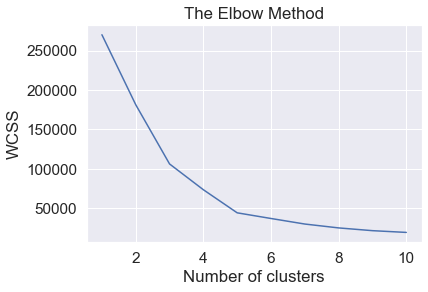

In [11]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

 **Note:** optimal number of clusters= 5

### Training the K-Means model on the dataset

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### Visualising the clusters by K-Means Algo

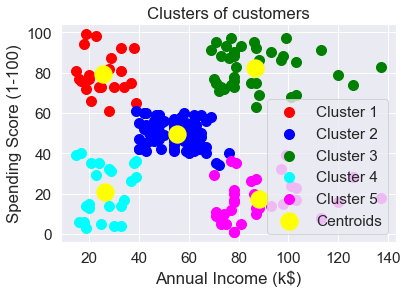

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

###   Hierarchical Clustering

### Using the dendrogram to find the optimal number of clusters

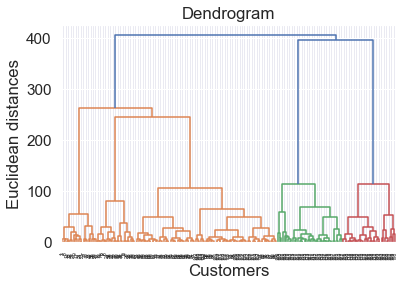

In [14]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

### Training the Hierarchical Clustering model on the dataset

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

### Visualising the clusters by Hierarchical Clustering

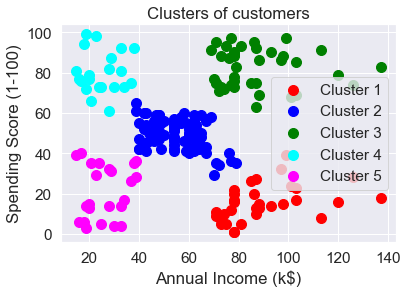

In [17]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 4. Conclusion:

**Sample Cluster info:**

Cluster0: Low spending, middle age, low income

Cluster1: High spending, young, low income

Cluster2: Low spending, middle age, high income

Cluster3: Middle spending, elderly, middle income

Cluster4: High spending, middle age, high income

Cluster5: Middle spending, youth, middle income

* It seems very clear that there is no big difference between male and female customers, so a gender-based audience should not be chosen.
* In addition, it seems that the audience between the ages of 20-40 spend more in this store compared to people in other age groups, making special campaigns for the audience between the ages of 20-40 can increase the profit of the supermarket.
*  This is not the optimal strategy, but it could be an alternative. Since the average spending scores of middle-income (40k-70k dollars) customers in this store are also at a medium level, it is difficult to increase their spending to higher levels because their income is not conducive to this, but by making campaigns to increase the number of these customers, the store can increase its profit by acquiring more middle-income customers.
* I think the best strategy would be to target high-income customers. The reason is that some of the high-income customers spend high, while a significant portion of these customers spend low, there may be some things that low-spenders are not satisfied. Improvements to be made in service and quality can increase the spending of high-income customers who come to the store, but do not.
* The distribution of the data was generally good, but the standard deviations were a little high
* There was no significant positive correlation between the data, only a negative correlation between age and spending score that could be important, showing us that older people who choose this supermarket spend less money than people in other age groups.

# Thank You